# Description


CharityML is a fictitious charity organization located in the heart of Silicon Valley that was established to provide financial support for people eager to learn machine learning. After nearly 32,000 letters were sent to people in the community, CharityML determined that every donation they received came from someone that was making more than $50,000 annually. To expand their potential donor base, CharityML has decided to send letters to residents of California, but to only those most likely to donate to the charity. With nearly 15 million working Californians, CharityML has brought you on board to help build an algorithm to best identify potential donors and reduce overhead cost of sending mail. Your goal will be evaluate and optimize several different supervised learners to determine which algorithm will provide the highest donation yield while also reducing the total number of letters being sent.

In [1]:
#import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,fbeta_score,precision_score,recall_score
import time
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

In [2]:
#too see all the columns of the dataset
pd.pandas.set_option("display.max_columns",None)

In [3]:
#loading the dataset
data=pd.read_csv("D:/Ai/Data_science/DSND_Term1-master/projects/p1_charityml/census.csv")

# Implementation: Data Exploration

In [71]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [72]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [7]:
data.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [9]:
#Total number of records
total_records=len(data)

#Individuals making more than 50K
indi_more_50=len(data[data['income']=='>50K'])

#Individuals making atmost 50K
indi_less_50=len(data[data['income']=='<=50K'])

#Percentage of individuals greater than 50K
percentage_greater=len(data[data['income']=='>50K'])/len(data)

print("Total number of records: {}".format(total_records))
print("The number of individuals making more than $50,000 annually: {}".format(indi_more_50))
print("The number of individuals making atmost $50,000 annually: {}".format(indi_less_50))
print("Pecentage of individuals having salary greater than 50K:  {}".format(percentage_greater))

Total number of records: 45222
The number of individuals making more than $50,000 annually: 11208
The number of individuals making atmost $50,000 annually: 34014
Pecentage of individuals having salary greater than 50K:  0.2478439697492371


In [10]:
#To see the total number of values in the dataset
def values(data):
    for i in data.columns:
        print("{} : {}".format(i,data[i].unique()))
        print("Total number of values: {}",format(len(data[i].unique())))
        print('\n')
values(data)

age : [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]
Total number of values: {} 74


workclass : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
Total number of values: {} 7


education_level : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
Total number of values: {} 16


education-num : [13.  9.  7. 14.  5. 10. 12.  4. 16. 11. 15.  3.  6.  1.  8.  2.]
Total number of values: {} 16


marital-status : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Total number of values: {} 7


occupation : [' Adm-clerical' ' Exec-managerial' ' Handlers-cle

In [7]:
#Splitting the data in categorical and numerical features

numerical_feature=[feature for feature in data.columns if data[feature].dtypes!='O']
categorical_feature=[feature for feature in data.columns if data[feature].dtypes=='O']

In [8]:
data[numerical_feature].head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13.0,2174.0,0.0,40.0
1,50,13.0,0.0,0.0,13.0
2,38,9.0,0.0,0.0,40.0
3,53,7.0,0.0,0.0,40.0
4,28,13.0,0.0,0.0,40.0


In [6]:
data[categorical_feature].head()

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [9]:
print("Total number of numerical features: ",len(numerical_feature))
print("Total number of categorical features: ",len(categorical_feature))

Total number of numerical features:  5
Total number of categorical features:  9


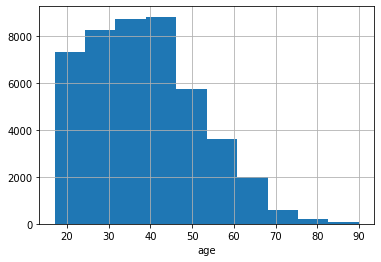

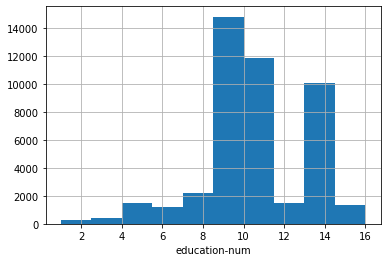

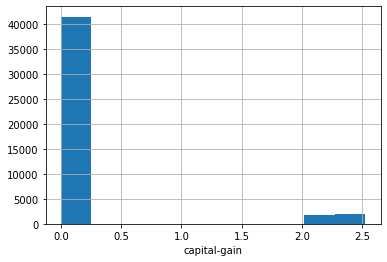

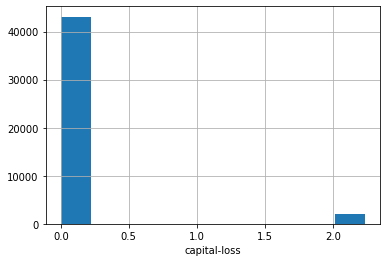

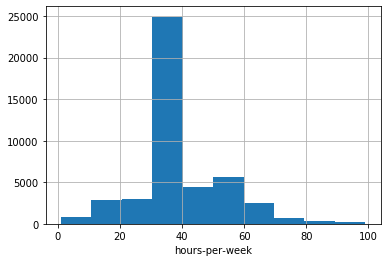

In [22]:
for feature in numerical_feature:
    data[feature].hist()
    plt.xlabel(feature)
    plt.show()

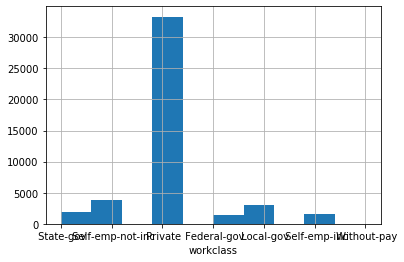

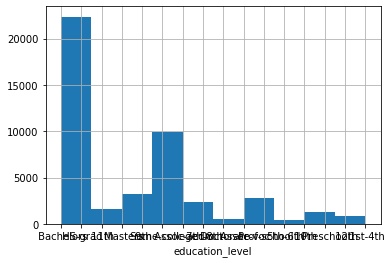

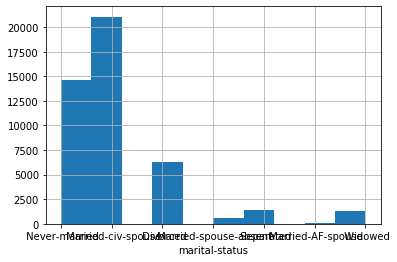

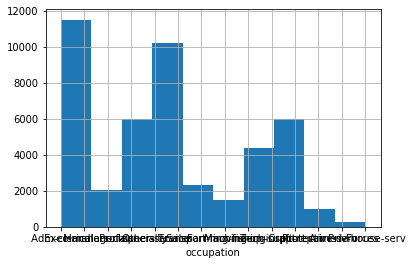

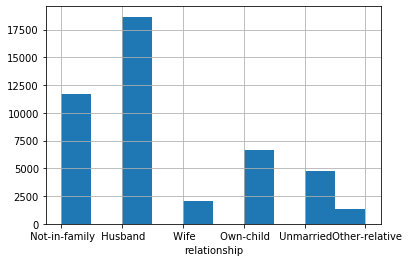

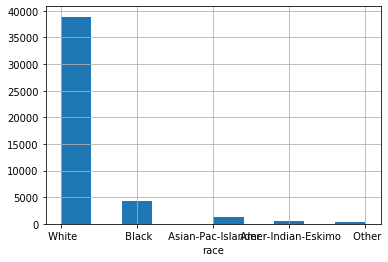

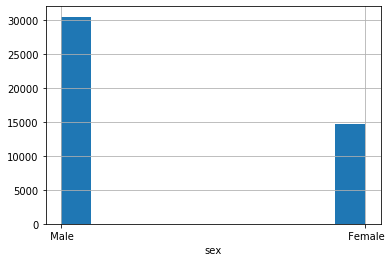

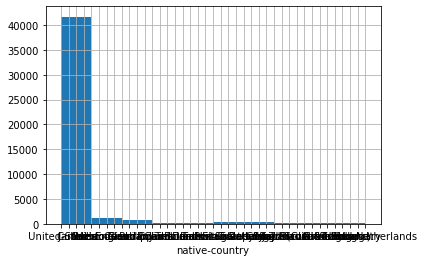

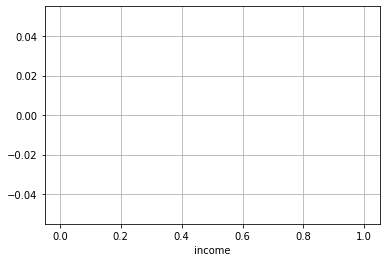

In [56]:
for feature in categorical_feature:
    dataset=data.copy()
    dataset['income']=dataset['income'].map({'<=50K':0,'>50K':1})
    dataset[feature].hist()
    #plt.figure( figsize=(15,8))
    plt.xlabel(feature)
    plt.show()

In [54]:
data['capital-gain'].unique()

array([ 2174.,     0., 14084.,  5178.,  5013.,  2407., 14344., 15024.,
        7688.,  4064.,  4386.,  7298.,  1409.,  3674.,  1055.,  2050.,
        2176.,   594., 20051.,  6849.,  4101.,  8614.,  3411.,  2597.,
       25236.,  4650.,  2463.,  3103., 10605.,  2964.,  3325.,  2580.,
        3471.,  4865., 99999.,  6514.,  1471.,  2329.,  2105.,  2885.,
       10520.,  2202.,  2961., 27828.,  6767.,  2228.,  1506., 13550.,
        2635.,  5556.,  4787.,  3781.,  3137.,  3818.,   914.,   401.,
        2829.,  2977.,  4934.,  2062.,  2354.,  3464.,  5455., 15020.,
        1424.,  3273., 22040.,  4416., 10566.,  4931.,  7430., 34095.,
        6497.,  3908.,   114.,  2346.,  2907.,  1151.,  9386.,  2414.,
        2290.,  3418., 15831., 41310.,  4508.,  2538.,  3456.,  1848.,
        3887.,  7896.,  5721.,  9562.,  6418.,  1455.,  2036.,  3942.,
        1831., 11678.,  2936.,  2993.,  7443.,  6360.,  4687.,  1797.,
        6723.,  2009.,  3432.,  6097.,  1639.,  2653., 18481., 25124.,
      


# Preparing the Data

In [20]:
# log transforming the the skewed features: capital-loss, capital-gain
skewed_features=['capital-gain', 'capital-loss']
data[skewed_features]=data[skewed_features].apply(lambda x: np.log(x+1))

In [21]:
X=data.drop('income',axis=1)
y=data['income'].map({'<=50K':0,'>50K':1})

In [22]:
#Applyinyg Minmax scaler to the data
scaler=MinMaxScaler()
X[numerical_feature]=scaler.fit_transform(X[numerical_feature])
X.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.93922,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba


## Implementation: Data preprocessing

In [12]:
y=data['income']

In [13]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [23]:
X=pd.get_dummies(X,drop_first=True)

In [24]:
X.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.93922,0.0,0.397959,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.00000,0.0,0.122449,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.00000,0.0,0.397959,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.00000,0.0,0.397959,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.00000,0.0,0.397959,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
X.shape

(45222, 95)

In [26]:
final_feature=list(X.columns)
print('Total independent features after one hot encoding:',len(final_feature))

Total independent features after one hot encoding: 95


### Splitting our dataset

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

print("Number of rows in taining dataset: {}".format(X_train.shape[0]))
print("Number of rows in test dataset: {}".format(X_test.shape[0]))

Number of rows in taining dataset: 36177
Number of rows in test dataset: 9045


In [29]:
for feature in X.columns:
    print("{}: {}".format(feature,X[feature].dtypes))

age: float64
education-num: float64
capital-gain: float64
capital-loss: float64
hours-per-week: float64
workclass_ Local-gov: uint8
workclass_ Private: uint8
workclass_ Self-emp-inc: uint8
workclass_ Self-emp-not-inc: uint8
workclass_ State-gov: uint8
workclass_ Without-pay: uint8
education_level_ 11th: uint8
education_level_ 12th: uint8
education_level_ 1st-4th: uint8
education_level_ 5th-6th: uint8
education_level_ 7th-8th: uint8
education_level_ 9th: uint8
education_level_ Assoc-acdm: uint8
education_level_ Assoc-voc: uint8
education_level_ Bachelors: uint8
education_level_ Doctorate: uint8
education_level_ HS-grad: uint8
education_level_ Masters: uint8
education_level_ Preschool: uint8
education_level_ Prof-school: uint8
education_level_ Some-college: uint8
marital-status_ Married-AF-spouse: uint8
marital-status_ Married-civ-spouse: uint8
marital-status_ Married-spouse-absent: uint8
marital-status_ Never-married: uint8
marital-status_ Separated: uint8
marital-status_ Widowed: uint8

## Model fitting 

In [30]:
model_svm=SVC(random_state=1)
model_random=RandomForestClassifier(random_state=1)
model_adaboost=AdaBoostClassifier(random_state=1)

model_svm.fit(X_train,y_train)
model_random.fit(X_train,y_train)
model_adaboost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [31]:
pred_svm=model_svm.predict(X_test)
pred_random=model_random.predict(X_test)
pred_adaboost=model_adaboost.predict(X_test)

In [35]:
#Metrics without hyperparameter optimization
def model_metric(model_name,predicted_list,y_test=y_test):
    print(model_name)
    print("Accuracy score: {}".format(accuracy_score(y_test,predicted_list)))
    print("Precision score: {}".format(precision_score(y_test,predicted_list)))
    print("F Beta score: {}".format(fbeta_score(y_test,predicted_list,beta=0.5)))
    print("Recall score: {}".format(recall_score(y_test,predicted_list)))
    print('\n')
    
    
model_metric("SVM",pred_svm)
model_metric("Random forest",pred_random)
model_metric("Adaboost",pred_adaboost)

SVM
Accuracy score: 0.8364842454394693
Precision score: 0.7236238532110092
F Beta score: 0.6832701678397402
Recall score: 0.5586542718016821


Random forest
Accuracy score: 0.84212271973466
Precision score: 0.7118816930137685
F Beta score: 0.6908838958725131
Recall score: 0.6179725542275343


Adaboost
Accuracy score: 0.8566058595909343
Precision score: 0.7717514124293785
F Beta score: 0.7313416854052897
Recall score: 0.6046923417441346


